# Longest Common Subsequence (LCS) Implementation

In [1]:
def longest_common_subsequences(x, y):
    '''
    Find all the longest common subsequences (LCS) between two strings

    Parameters
    ----------
    x : str
        First input string
    y : str
        Second input string

    Returns
    -------
    tuple
        A tuple containing:
        - list of str: All unique longest common subsequences between x and y
        - int: Length of the longest common subsequences
    '''
    # empty string cases
    if not x or not y:
        return ([], 0)
    
    # STEP 1: the length table (LCS dynamic programming)
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i-1] == y[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    
    lcs_length = dp[m][n]  # length of LCSs
    
    # if length is 0, return appropriate result (LCS is empty string/no LCS)
    if lcs_length == 0:
        return ([], 0)
    
    # STEP 2: backtrack to find all possible LCSs
    def backtrack(i, j, current_length):
        # base case: if we've used up all characters from target LCS length
        if current_length == 0:
            return [""]
    
        # base case: reached beginning of either string before using all LCS chars
        if i == 0 or j == 0:
            return []
        
        result = []
        
        # case 1: characters match -> must include this character in LCS
        if x[i-1] == y[j-1]:
            # adding current character to all subsequences from diagonal cell
            sub_lcs = backtrack(i-1, j-1, current_length-1)
            for s in sub_lcs:
                result.append(s + x[i-1])
        else:
            # case 2: characters don't match -> follow paths with maximum LCS length
            max_length = max(dp[i-1][j], dp[i][j-1])
            
            # left cell has maximum LCS length, explore that path
            if dp[i][j-1] == max_length:
                result.extend(backtrack(i, j-1, current_length))
                
            # up cell has maximum LCS length, explore that path
            if dp[i-1][j] == max_length:
                result.extend(backtrack(i-1, j, current_length))
        
        return result
    
    # getting all LCS by calling backtracking with target length
    all_lcs_with_duplicates = backtrack(m, n, lcs_length)
    
    # removing duplicates while preserving order
    all_lcs = []
    seen = set()
    for lcs in all_lcs_with_duplicates:
        if lcs not in seen:
            seen.add(lcs)
            all_lcs.append(lcs)
    
    return (all_lcs, lcs_length)

In [2]:
# TESTING longest_common_subsequences()
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'

# additional test cases
x5, y5 = 'hello', 'hello'
x6, y6 = 'abc', 'xyz'
x7, y7 = 'AXYT', 'AYZX'
x8, y8 = 'AbCd', 'aBcD'
x9, y9 = 'ABABC', 'BABCA'
x10, y10 = 'PROGRAMMING', 'GAMING'
x11, y11 = 'A!B@C#', '!@#ABC'
x12 = 'A' * 100 + 'B'
y12 = 'A' * 100 + 'C'

# assertinons
assert sorted(longest_common_subsequences(x1, y1)[0]) == sorted(['BDAB', 'BCBA', 'BCAB']) and longest_common_subsequences(x1, y1)[1] == 4
assert longest_common_subsequences(x2, y2) == ([], 0)
assert longest_common_subsequences(x3, y3) == (['a'], 1)
assert longest_common_subsequences(x4, y4) == (['ac'], 2)
assert longest_common_subsequences(x5, y5) == (['hello'], 5)
assert longest_common_subsequences(x6, y6) == ([], 0)
assert sorted(longest_common_subsequences(x7, y7)[0]) == sorted(['AY', 'AX']) and longest_common_subsequences(x7, y7)[1] == 2
assert longest_common_subsequences(x8, y8) == ([], 0)
assert longest_common_subsequences(x9, y9) == (['BABC'], 4)
assert longest_common_subsequences(x10, y10) == (['GAMING'], 6)
assert sorted(longest_common_subsequences(x11, y11)[0]) == sorted(['ABC', '!BC', '!@C', '!@#']) and longest_common_subsequences(x11, y11)[1] == 3
assert longest_common_subsequences(x12, y12)[1] == 100

# LCS Length Matrix Analysis

In [3]:
def longest_common_subsequence_length(x, y):
    '''
    Calculate only the length of the longest common subsequence.
    
    Uses dynamic programming to find the length of the LCS without
    reconstructing the actual subsequence.
    
    Parameters
    ----------
    x : str
        First string to compare
    y : str
        Second string to compare
        
    Returns
    -------
    int
        Length of the longest common subsequence
    '''
    # empty string cases
    if not x or not y:
        return 0
    
    # the length table (LCS dynamic programming)
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i-1] == y[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    
    return dp[m][n]

In [4]:
import numpy as np
set_strings = [('a','TGGGTCCGAAAGACCTGCTTTCCGGAGCGTATAGTGTTTATGGTATCCCCGGATACGCCTGGCTACTGACACCTGAAGTATAGCAGTGAGTAATTTAATTAAACAGCGGGGTCGTTGAGCGCAATTAGTCACCATACTCGAATCTAACCAAATTAACTGGGTTTAGAGACATAAGGTGGCAAAGGATGAAACATTTGTACGAGTCCAAGCTCTAGTTAATGACGTCGTTGTAACAAATGATCCCAACCGTCATCTTGAACTCCAGGCATTGAAGCAAAGGAGGTGTTCCTCGGGCCACTTTACGACACTGCCCTTCGAGACGAGCGGAACACCGTCGCCTTTCGAGGTGAATTATAACTGCTCGGACGCCGCGAGCGTTTGACCAAACGGCAGCTAGTAACCAGTCTGTAGCACAGAGCTGGTGTTTACGAGAATTAGTCCGGCGAATTAAAACGTAATGCCTGACCAGATGACAAGCGTGCCAAGAGTTTCAAAACGCAGACATCTCCCCCCATTCAGTGTCTCTGGTCTTGTCCGACCCCAGGGGCGGCA'),
('b','TGGTGCGAAACATACTCTTTTCGCGTGGCGTTATAGTTTATAGGGTATCCCCAGGAACGCTGGCTACCTACAATCTCCGAAGTATCAGAGTGAGTGAGATTTAATTAACAGGGGACTCGAGTGACGCGATTAGCACCCAACTGAATCTAACATGAATTAAACGTGGGTTTAGTGACTATAGGGCAAAAGGAATGCATACATTTCCGAGCAGCTCAATAAGAGCGTGCAATGATGAAATCCATCACGTCTCTTGACTCCGTAGTATTGAGCAACAGGTTGTTTCCTCAGGTCACACCTAGCATGCTTGAGCAGAAACGCGCCTATTCGGGGATTATAACCGTCGACTGCCATCACTGGGCAACAACGGACGCTAAGTACCTGAGCTGTAGGCACGAAGCTGCGTTGTTCGACAGATTTGTGCCGGGGATAACAGGGTAATATGCCTAGCCTGGCAGGTGACACGGCGATGCCAAAGAGTTCAAAGACCACCTCCCCTCCGCTTTCTTTCTGGAGTAGCTTTCCGCCACGGGGCGA'),
('c','TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCTAGATTGAGCAAGAGGTTGTTCCTCGGCCACTTAGACATGCTTGAGCACGAACACGCGCCTTTCGGGTGATTATAACGTCGACGCCACTCCTGGAACAACGGCAGCTAAGTACTGAGCGTGTAGCACGAGCTGGTGTTCGAAGATTTGTGCCGGGGATAAAGGGTAAATGCCTGCCCGCAGTGACACGGCGTGCCAAGAGTTCAAAGCACTCTCCCCCCATCGTTTCTGGGTGCTTTCCGCCCAGGGGCGA'),
('d','TGGTGCGAAACATACTCTTTTCGCGTGGAGTTATAGTTATAGGTATCGCCCAGGAACGTGGGCTAACCTACAATCTCCGAAGTATAAGAGTTGAGTGAGCATTTAATGTAAAGGGGATCTCGAGTGACGCGATTAGCACCCAACAGAACCTAACATGAATTAGACTGGGTTTAGTGTACTTATAGGGCCAAAAAGAATGATTACCATTTCCGAGCATGCCCAAGTAAGAGCGTGCAATGGTAGAAATCCATCACGTCTCTTGACTCCGGGAGTGATTGAGCAACGGTTGTTTCGCTCAGTGTCATCACCTAGGCATCTATGAGCAGCAAATGCGCCTATCGGGGGATGTATAACCGTCGACTGCCATCAGCTTGGGCAACAAACCGGACAGCTTAAGTACCTGAGCTGTAGAGCCGAAGCTGCGTTGTTTGACAAATTTGTGCCGGGGAGTACAGCAGTATATGGCCTCAGCTCTGGCCAGGTGACACCGGCGATGCCAAAGACGTTTCAAAGAACCACCTCCCTCCGCTTTTCATTTCGGAGGTACCTTTCCACGGTGGCG'),
('e','TGGTGCGAAAGCCTCTTTCCATGGGTATAGCTGGTTTATCGTATCCCGTGATACGCCTGGCTACCTACAATCCCGAAGTATGCCAGTGAGAGATTTAATTTAACTAGGACGGGGTCGTTGACGCAATTAGATACACGCATACTGAATCAACGAATAACTTAACTGGGTTTACAGTGACATAGAATGCAAAGGGATGAAGCATTTGGTCGGAGTCAGCTCTCATAATGGAGTCGTATGACAACATCGATCGCAACCGTCACTTGACTTCAGATTGAAAGCATAGGAGAGTTGCTCCTCGGGCCACTTAGAACACTGCTGAGACGACGACACGCGCCTTTCCGAGGTGATTTTAACGCTCGACGCCGACGTTGAGACCAACGGCAGCGTAGAACCAGGTCGATTTACACGGCTGTGTTAGAGAGATTATCGTCCGGCGAATACAAGGTAAAATGACCTAGACCCCAGATGACAACGCGTGCCAAGAGTTCAAACGCAGCATCTCCCCTCCATGCGTTCTCTGGGTGCTTTCCGACCCAGGGGACGCA'),
('f','TGGTGCGAAACATAATCTTTTCGCGGCGTTTAGTAGTTTATAGGGTATCCCCAGGAACGCTGGCTACCACTAACTCTCCGAAGTATCAAGAGTGAGTAGATTTAATTAACAGGGGATCGAGTGACCGCGATTAGCACCCAACCTGAATCTAACATGAATTAAAACGTTGGGTTTAGTAGACTTGATAGGGCAAAAGGACAGCTTACATTCCCGTGCAGCTCAATGAAGACGTGCAATGGTGAAATCCATCACGTCTCTTGACTCGCGAGATATTGAGCAACAGGTTGTTTACCCAGGTCACACCTAGCAGCTTGATGAGAAACGCGCACTATTCGCGGGATTTATTACCGTCGACTGCCATCAACTGGCAACAACCGGACGCTTACACCTGCAGACTGTAGGCACGAAGCTGGTTGTTACGACAGATTTGTGCCCGGGATAACAGCGTGTAATATGCCTAGCCTGGCAGGTGCGACGGCGATGCCAAGAGTTCAAAGACGCATCCTCCCCTCGCTTTCCTTATTCTGGAGAGTCTTTCCAGCCTATCGGGGCCGA'),
('g','TGGTGCGAAAGCCTCTTTCCGTGGCGTATAGTGTTTATGGTATCCCCGGATACGCCTGGCTACCTACATCTCCGAAGTATAGCAGTGAGTAGATTTAATTAACAGACGGGCGTCGTTGAGCGCAATTAGTCACCATACTGAATCAACGAATAACTTAACTGGGTTTCAGTGACATAAGGGCAAAGGATGAACATTTGTCGAGTCAGCTCTATAATGAGTCGTTGACAAATGATCCAACCGTCATCTTGAACTCCAGATTGAAGCAAGGAGGTTGTTCCTCGGGCCACTTAGACACTGCTTGAGACGACGAACACGCGCCTTTCGAGGTGATTATAACGCTCGGACGCCGACGTTTGGACCAACGGCAGCTAGTAACCAGTCGTGTAGCACGAGCTGGTGTTACGAGAGATTATGTCCGGCGGAATAAAAGGTAAATGCCTGACCCAGATGACAACGCGTGCCAAGAGTTCAAACGCAGCATCTCCCCCCATCGTTCTCTGGGTGCTTTCCGACCCAGGGGCGCA')]
num_strings = len(set_strings)
len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

# calculating LCS length for each pair of strings
for i in range(num_strings):
    for j in range(num_strings):
        # getting the strings (without labels)
        str_i = set_strings[i][1]
        str_j = set_strings[j][1]
        
        # calculating only the LCS length
        lcs_length = longest_common_subsequence_length(str_i, str_j)
        len_lcs_matrix[i, j] = lcs_length
        
unique_lcs_lengths = np.unique(len_lcs_matrix)

for label, sequence in set_strings:
    print(f"Gene {label}: {len(sequence)} nucleotides")
print(f"\nNumber of unique LCS lengths: {len(unique_lcs_lengths)}")
print(f"Unique LCS lengths: {unique_lcs_lengths}")
print("\nLCS Length Matrix:")
print(len_lcs_matrix)

Gene a: 552 nucleotides
Gene b: 534 nucleotides
Gene c: 500 nucleotides
Gene d: 562 nucleotides
Gene e: 545 nucleotides
Gene f: 555 nucleotides
Gene g: 524 nucleotides

Number of unique LCS lengths: 27
Unique LCS lengths: [418 424 426 432 433 434 436 444 448 451 453 456 470 473 477 485 496 497
 500 502 507 524 534 545 552 555 562]

LCS Length Matrix:
[[552 434 453 426 473 426 497]
 [434 534 470 502 433 507 451]
 [453 470 500 444 456 448 477]
 [426 502 444 562 418 485 432]
 [473 433 456 418 545 424 496]
 [426 507 448 485 424 555 436]
 [497 451 477 432 496 436 524]]


In [5]:
# Manual Examination
gene_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

for i in range(num_strings):
    lcs_values = len_lcs_matrix[i] # row
    lcs_values[i] = -1  # excluding the diagonal by setting it to a very low value
    
    strongest_indices = np.argsort(lcs_values)[-2:]
    
    print(f"Gene {gene_labels[i]}:")
    print(f"Strongest connections: Gene {gene_labels[strongest_indices[0]]} and Gene {gene_labels[strongest_indices[1]]}")
    print(f"LCS values: {lcs_values[strongest_indices[0]]}, {lcs_values[strongest_indices[1]]}")
    print()

Gene a:
Strongest connections: Gene e and Gene g
LCS values: 473, 497

Gene b:
Strongest connections: Gene d and Gene f
LCS values: 502, 507

Gene c:
Strongest connections: Gene b and Gene g
LCS values: 470, 477

Gene d:
Strongest connections: Gene f and Gene b
LCS values: 485, 502

Gene e:
Strongest connections: Gene a and Gene g
LCS values: 473, 496

Gene f:
Strongest connections: Gene d and Gene b
LCS values: 485, 507

Gene g:
Strongest connections: Gene e and Gene a
LCS values: 496, 497



In [6]:
# I calculate len_lcs_matrix again as I changed values to -1 in the previous cell
len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

for i in range(num_strings):
    for j in range(num_strings):
        # getting the strings (without labels)
        str_i = set_strings[i][1]
        str_j = set_strings[j][1]
        
        # calculating only the LCS length
        lcs_length = longest_common_subsequence_length(str_i, str_j)
        len_lcs_matrix[i, j] = lcs_length
        
normalized_similarity_matrix = np.zeros((num_strings, num_strings))
gene_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
gene_lengths = np.array([552, 534, 500, 562, 545, 555, 524])  # [a, b, c, d, e, f, g]
for i in range(num_strings):
    for j in range(num_strings):
        # average length of the two sequences
        avg_length = (gene_lengths[i] + gene_lengths[j]) / 2
        normalized_similarity_matrix[i, j] = len_lcs_matrix[i, j] / avg_length # normalizing LCS length by average length
        
np.set_printoptions(precision=4, suppress=True)
print(normalized_similarity_matrix)

[[1.     0.7993 0.8612 0.7648 0.8624 0.7696 0.9238]
 [0.7993 1.     0.9091 0.9161 0.8026 0.9311 0.8526]
 [0.8612 0.9091 1.     0.8362 0.8727 0.8493 0.9316]
 [0.7648 0.9161 0.8362 1.     0.7552 0.8684 0.7956]
 [0.8624 0.8026 0.8727 0.7552 1.     0.7709 0.928 ]
 [0.7696 0.9311 0.8493 0.8684 0.7709 1.     0.8082]
 [0.9238 0.8526 0.9316 0.7956 0.928  0.8082 1.    ]]


# Local & Global Tree Construction Approaches

In [7]:
class TreeNode:
    '''
    A node in a binary tree representing a gene in the genealogical tree.
    
    Attributes
    ----------
    gene_label : str
        The label of the gene this node represents
    left : TreeNode or None
        The left child node
    right : TreeNode or None
        The right child node
    '''
    def __init__(self, gene_label):
        '''
        Initialize a new TreeNode.
        
        Parameters
        ----------
        gene_label : str
            The label of the gene this node represents
        '''
        self.gene_label = gene_label
        self.left = None
        self.right = None
    
    def __str__(self):
        '''
        Get string representation of the node.
        
        Returns
        -------
        str
            String representation of the node
        '''
        return f"Node({self.gene_label})"

def print_tree(node, prefix="", is_left=True, is_root=True):
    '''
    Print a visual representation of the tree with branches.
    
    Creates a text-based visualization of the tree structure, with different
    branch connectors for left and right children.
    
    Parameters
    ----------
    node : TreeNode or None
        Current node to print
    prefix : str, optional
        Prefix string for current line, default=""
    is_left : bool, optional
        Whether the current node is a left child, default=True
    is_root : bool, optional
        Whether the current node is the root, default=True
        
    Returns
    -------
    None
        This function prints to stdout and does not return a value
    '''
    if node is None:
        return
    
    if is_root:
        connector = "┌─ "
        child_prefix = "│  "
    else:
        connector = "├─ " if is_left else "└─ "
        child_prefix = "│  " if is_left else "   "
    
    print(f"{prefix}{connector}Gene {node.gene_label}")
    
    if node.left or node.right:  # if node has any children
        print_tree(node.left, prefix + child_prefix, True, False)
        print_tree(node.right, prefix + child_prefix, False, False)

## Local Approach

In [8]:
def reconstruct_tree_local(normalized_matrix, gene_labels):
    '''
    Reconstruct the genealogical tree using a local approach.
    
    Uses a greedy strategy to build the tree level by level, first identifying the grandparent,
    then parents, then grandchildren, based on normalized similarity scores.
    
    Parameters
    ----------
    normalized_matrix : numpy.ndarray
        2D array of normalized similarity scores between genes
    gene_labels : list
        List of labels for each gene corresponding to indices in the matrix
    
    Returns
    -------
    TreeNode
        The root node of the reconstructed genealogical tree
    '''
    num_genes = len(gene_labels)
    
    # Step 1: finding the grandparent (root): gene with highest average similarity to all others
    avg_similarities = np.mean(normalized_matrix, axis=1)
    grandparent_idx = np.argmax(avg_similarities)
    grandparent_label = gene_labels[grandparent_idx]
    
    root = TreeNode(grandparent_label)
    
    # Step 2: finding the two most similar genes to the grandparent (parents)
    similarities_to_grandparent = normalized_matrix[grandparent_idx].copy()
    similarities_to_grandparent[grandparent_idx] = 0  # exclude self-similarity

    # finding the two most similar genes
    parent_indices = np.argsort(similarities_to_grandparent)[-2:]  # top 2
    parent_labels = [gene_labels[idx] for idx in parent_indices]
    
    parent_nodes = [TreeNode(label) for label in parent_labels]
    root.left = parent_nodes[0]
    root.right = parent_nodes[1]
    
    # Step 3: finding children for each parent
    remaining_indices = [i for i in range(num_genes) 
                        if i != grandparent_idx and i not in parent_indices]
    
    # finding two most similar children
    for parent_idx, parent_node in zip(parent_indices, [root.left, root.right]):
        similarities_to_parent = normalized_matrix[parent_idx].copy()
        
        # zeroing out indices we have already used
        similarities_to_parent[grandparent_idx] = 0
        similarities_to_parent[parent_indices] = 0
        
        # finding the two most similar remaining genes
        child_indices = []
        for _ in range(2):
            if len(remaining_indices) > 0:
                # getting the best remaining index
                best_remaining_idx = max(remaining_indices, 
                                         key=lambda idx: similarities_to_parent[idx])
                child_indices.append(best_remaining_idx)
                remaining_indices.remove(best_remaining_idx)
        
        # creating child nodes and attaching to parent
        if len(child_indices) >= 1:
            parent_node.left = TreeNode(gene_labels[child_indices[0]])
        if len(child_indices) >= 2:
            parent_node.right = TreeNode(gene_labels[child_indices[1]])
    
    return root

In [9]:
root = reconstruct_tree_local(normalized_similarity_matrix, gene_labels)
print("Reconstructed Tree (Local Approach):")
print_tree(root)

Reconstructed Tree (Local Approach):
┌─ Gene c
│  ├─ Gene b
│  │  ├─ Gene f
│  │  └─ Gene d
│  └─ Gene g
│     ├─ Gene e
│     └─ Gene a


## Global Approach

In [10]:
from itertools import combinations

def reconstruct_tree_global(distance_matrix, gene_labels):
    '''
    Reconstruct the genealogical tree using a global approach that considers all possible tree configurations.
    
    Uses dynamic programming with memoization to find the optimal tree structure that minimizes
    the weighted distance score across all genes.
    
    Parameters
    ----------
    distance_matrix : numpy.ndarray
        2D array containing distance/dissimilarity between each pair of genes
    gene_labels : list
        List of labels for each gene corresponding to indices in the distance matrix
    
    Returns
    -------
    TreeNode
        The root node of the reconstructed genealogical tree
    '''
    n = len(gene_labels)
    weights = {1: 1.0, 2: 0.5, 3: 0.25}
    memo = {}
    score_memo = {}

    def assign_positions(node_idx, children, depth, path, positions):
        '''
        Assign tree positions (depth and path) to nodes in a tree configuration.
        
        Parameters
        ----------
        node_idx : int
            Index of the current node
        children : list
            List of child node indices
        depth : int
            Current depth in the tree
        path : str
            String representation of the path to this node
        positions : dict
            Dictionary to store node positions, updated in-place
        '''
        positions[node_idx] = (depth, path)
        if not children:
            return
        mid = len(children) // 2
        if mid > 0:
            left = children[:mid]
            assign_positions(left[0], left[1:], depth + 1, path + ".left", positions)
        if len(children[mid:]) > 0:
            right = children[mid:]
            assign_positions(right[0], right[1:], depth + 1, path + ".right", positions)

    def score_tree_cached(root_idx, left_indices, right_indices):
        '''
        Calculate the score for a specific tree configuration with memoization.
        
        Score is based on weighted distances between all pairs of nodes in the tree.
        
        Parameters
        ----------
        root_idx : int
            Index of the root node
        left_indices : list
            Indices of nodes in the left subtree
        right_indices : list
            Indices of nodes in the right subtree
        
        Returns
        -------
        float
            Score of the tree configuration (lower is better)
        '''
        key = (root_idx, tuple(sorted(left_indices)), tuple(sorted(right_indices)))
        if key in score_memo:
            return score_memo[key]

        all_indices = [root_idx] + left_indices + right_indices
        positions = {}
        assign_positions(root_idx, [], 0, "root", positions)

        if left_indices:
            assign_positions(left_indices[0], left_indices[1:], 1, "left", positions)
        if right_indices:
            assign_positions(right_indices[0], right_indices[1:], 1, "right", positions)

        score = 0
        for i in range(len(all_indices)):
            for j in range(i+1, len(all_indices)):
                idx1, idx2 = all_indices[i], all_indices[j]
                (d1, p1), (d2, p2) = positions[idx1], positions[idx2]
                common_prefix = 0
                for a, b in zip(p1.split("."), p2.split(".")):
                    if a == b:
                        common_prefix += 1
                    else:
                        break
                tree_dist = (d1 - (common_prefix - 1)) + (d2 - (common_prefix - 1))
                weight = weights.get(tree_dist, 0.1)
                score += weight * distance_matrix[idx1][idx2]

        score_memo[key] = score
        return score

    def optimal_tree(indices):
        '''
        Find the optimal tree for a given set of gene indices using dynamic programming.
        
        Parameters
        ----------
        indices : list
            List of gene indices to include in the tree
        
        Returns
        -------
        tuple
            (TreeNode, float) - The root of the optimal tree and its score
        '''
        if len(indices) == 0:
            return None, 0
        if len(indices) == 1:
            return TreeNode(gene_labels[indices[0]]), 0
        if len(indices) == 2:
            root_idx, child_idx = indices[0], indices[1]
            root = TreeNode(gene_labels[root_idx])
            root.left = TreeNode(gene_labels[child_idx])
            score = score_tree_cached(root_idx, [child_idx], [])
            return root, score

        indices_key = tuple(sorted(indices))
        if indices_key in memo:
            return memo[indices_key]

        best_score = float('inf')
        best_tree = None

        for root_idx in indices:
            remaining = [i for i in indices if i != root_idx]
            for left_size in range(1, len(remaining)):
                for left_indices in combinations(remaining, left_size):
                    left_indices = list(left_indices)
                    right_indices = [i for i in remaining if i not in left_indices]
                    current_score = score_tree_cached(root_idx, left_indices, right_indices)
                    left_tree, left_score = optimal_tree(left_indices)
                    right_tree, right_score = optimal_tree(right_indices)
                    total_score = current_score + left_score + right_score
                    if total_score < best_score:
                        best_score = total_score
                        best_tree = TreeNode(gene_labels[root_idx])
                        best_tree.left = left_tree
                        best_tree.right = right_tree

        memo[indices_key] = (best_tree, best_score)
        return best_tree, best_score

    all_indices = list(range(n))
    best_tree, _ = optimal_tree(all_indices)
    return best_tree

In [11]:
root = reconstruct_tree_global(1 - normalized_similarity_matrix, gene_labels)
print(f"Reconstructed Tree (Global Approach):")
print_tree(root)

Reconstructed Tree (Global Approach):
┌─ Gene c
│  ├─ Gene g
│  │  ├─ Gene a
│  │  └─ Gene e
│  └─ Gene b
│     ├─ Gene d
│     └─ Gene f


# Complexity Analysis

In [12]:
import time
import matplotlib.pyplot as plt

def generate_matrix(n):
    '''
    Generate a random symmetric matrix with ones on the diagonal and values in interval [0, 1] for all the other entries.
    
    Parameters
    ----------
    n : int
        Size of the square matrix (n x n)
        
    Returns
    -------
    numpy.ndarray
        A random symmetric matrix of size n x n with values in [0,1] and ones on the diagonal
    '''
    matrix = np.random.random((n, n))
    matrix = (matrix + matrix.T) / 2 # symmetric
    np.fill_diagonal(matrix, 1.0) # diagonals have to be 1
    return matrix

def time_algorithm(n_values, tree_construction_algorithm, num_trials=5):
    '''
    Time the execution of the tree reconstruction algorithm for different values of N.
    
    Parameters
    ----------
    n_values : list
        List of N values to test
    tree_construction_algorithm : function
        The algorithm function to time
    num_trials : int, optional
        Number of trials to run for each N (to get average), default=5
        
    Returns
    -------
    dict
        Dictionary with N values and corresponding average runtimes:
        {'n_values': [n1, n2, ...], 'times': [t1, t2, ...]}
    '''
    times = []
    
    for n in n_values:
        print(f"Testing N = {n}", end="")
        trial_times = []
        
        for trial in range(num_trials):
            matrix = generate_matrix(n) # random input
            labels = [f"gene_{i}" for i in range(n)]
            
            start_time = time.time()
            tree_construction_algorithm(matrix, labels)
            end_time = time.time()
            
            execution_time = end_time - start_time
            trial_times.append(execution_time)
        
        avg_time = sum(trial_times) / num_trials # averaging multiple runs for each data point
        times.append(avg_time)
        print(f", Average: {avg_time:.6f} seconds")
    
    return {
        'n_values': n_values,
        'times': times
    }

def plot_results(results, tree_construction_algorithm):
    '''
    Plot runtime results against theoretical complexity curves for a specific algorithm.
    
    Parameters
    ----------
    results : dict
        Dictionary containing timing results with keys:
        'n_values': list of N values tested
        'times': list of corresponding runtimes in seconds
    tree_construction_algorithm : function
        The algorithm function that was timed (either reconstruct_tree_local or reconstruct_tree_global)
    
    Returns
    -------
    dict
        Dictionary containing theoretical curve data:
        For local algorithm: {'n2_curve': [...], 'nlogn_curve': [...]}
        For global algorithm: {'global_curve': [...]}
    '''
    n_values = results['n_values']
    times = results['times']
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(n_values, times, 'o-', label='Experimental Runtime', linewidth=2)
    
    max_n = max(n_values)
    max_time = max(times)
    
    if tree_construction_algorithm == reconstruct_tree_local:
        # O(n^2) theoretical for local
        n_squared = [n**2 for n in n_values]
        scale_n2 = max_time / (max_n**2)
        n2_curve = [scale_n2 * val for val in n_squared]
        plt.plot(n_values, n2_curve, 'r--', label='O(N²) Theoretical', alpha=0.7)

        # O(n log n) theoretical for local
        n_log_n = [n * np.log(n) for n in n_values]
        scale_nlogn = max_time / (max_n * np.log(max_n))
        nlogn_curve = [scale_nlogn * val for val in n_log_n]
        plt.plot(n_values, nlogn_curve, 'g--', label='O(N log N) Theoretical', alpha=0.7)
    
    elif tree_construction_algorithm == reconstruct_tree_global:
        # O(2^n * n^3) theoretical for global
        global_complexity = [2**n * (n**3) for n in n_values]
        scale_global = max_time / global_complexity[-1]
        global_curve = [scale_global * val for val in global_complexity]
        plt.plot(n_values, global_curve, 'm--', label='O(2^N × N^3) Theoretical', alpha=0.7)
    
    plt.xlabel('Number of Genes (N)', fontsize=12)
    plt.ylabel('Average Runtime (seconds)', fontsize=12)
    if tree_construction_algorithm == reconstruct_tree_local:
        plt.title('Local Tree Reconstruction Algorithm Runtime Analysis', fontsize=14)
    elif tree_construction_algorithm == reconstruct_tree_global:
        plt.title('Global Tree Reconstruction Algorithm Runtime Analysis', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    print("\nAverage Runtime Analysis Results:")
    print("-" * 60)
    if tree_construction_algorithm == reconstruct_tree_local:
        print(f"{'N':<8} {'Runtime (s)':<12} {'O(N²)':<12} {'O(N log N)':<12}")
    elif tree_construction_algorithm == reconstruct_tree_global:
        print(f"{'N':<8} {'Runtime (s)':<12} {'O(2^N * N^3)':<12}")
    print("-" * 60)
    for i, n in enumerate(n_values):
        if tree_construction_algorithm == reconstruct_tree_local:
            print(f"{n:<8} {times[i]:<12.6f} {n2_curve[i]:<12.6f} {nlogn_curve[i]:<12.6f}")
        elif tree_construction_algorithm == reconstruct_tree_global:
            print(f"{n:<8} {times[i]:<12.6f} {global_curve[i]:<12.6f}")
    
    if tree_construction_algorithm == reconstruct_tree_local:
        return {'n2_curve': n2_curve, 'nlogn_curve': nlogn_curve}
    return {'global_curve': global_curve}

Testing N = 7, Average: 0.001437 seconds
Testing N = 10, Average: 0.001098 seconds
Testing N = 20, Average: 0.000372 seconds
Testing N = 30, Average: 0.000331 seconds
Testing N = 50, Average: 0.000540 seconds
Testing N = 100, Average: 0.000938 seconds
Testing N = 150, Average: 0.001172 seconds
Testing N = 200, Average: 0.001623 seconds
Testing N = 500, Average: 0.003743 seconds
Testing N = 1000, Average: 0.008820 seconds

Average Runtime Analysis Results:
------------------------------------------------------------
N        Runtime (s)  O(N²)        O(N log N)  
------------------------------------------------------------
7        0.001437     0.000000     0.000017    
10       0.001098     0.000001     0.000029    
20       0.000372     0.000004     0.000076    
30       0.000331     0.000008     0.000130    
50       0.000540     0.000022     0.000250    
100      0.000938     0.000088     0.000588    
150      0.001172     0.000198     0.000960    
200      0.001623     0.000353    

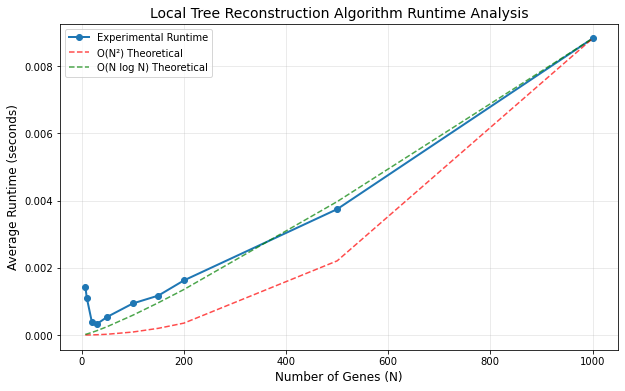

In [13]:
n_values = [7, 10, 20, 30, 50, 100, 150, 200, 500, 1000]
results = time_algorithm(n_values, reconstruct_tree_local)
analysis = plot_results(results, reconstruct_tree_local)
plt.show()

Testing N = 3, Average: 0.000168 seconds
Testing N = 4, Average: 0.000989 seconds
Testing N = 5, Average: 0.003877 seconds
Testing N = 6, Average: 0.022624 seconds
Testing N = 7, Average: 0.112058 seconds
Testing N = 8, Average: 0.563008 seconds
Testing N = 9, Average: 2.838567 seconds
Testing N = 10, Average: 14.908146 seconds

Average Runtime Analysis Results:
------------------------------------------------------------
N        Runtime (s)  O(2^N * N^3)
------------------------------------------------------------
3        0.000168     0.003145    
4        0.000989     0.014908    
5        0.003877     0.058235    
6        0.022624     0.201260    
7        0.112058     0.639187    
8        0.563008     1.908243    
9        2.838567     5.434019    
10       14.908146    14.908146   


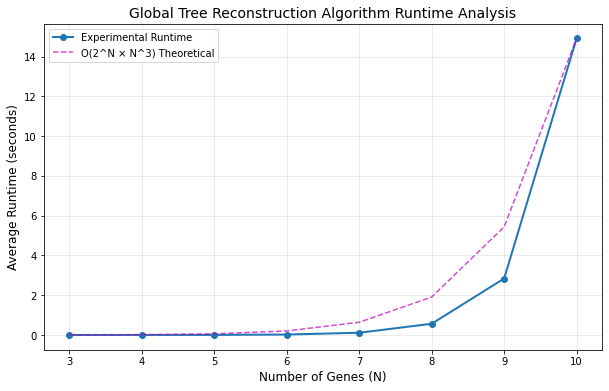

In [14]:
n_values = [3, 4, 5, 6, 7, 8, 9, 10]
results = time_algorithm(n_values, reconstruct_tree_global)
analysis = plot_results(results, reconstruct_tree_global)
plt.show()

Testing N = 3, Average: 0.002255 seconds
Testing N = 4, Average: 0.000480 seconds
Testing N = 5, Average: 0.001534 seconds
Testing N = 6, Average: 0.000769 seconds
Testing N = 7, Average: 0.000656 seconds
Testing N = 8, Average: 0.000431 seconds
Testing N = 9, Average: 0.000545 seconds
Testing N = 10, Average: 0.000457 seconds
Testing N = 3, Average: 0.000237 seconds
Testing N = 4, Average: 0.001624 seconds
Testing N = 5, Average: 0.005527 seconds
Testing N = 6, Average: 0.033829 seconds
Testing N = 7, Average: 0.220079 seconds
Testing N = 8, Average: 0.623102 seconds
Testing N = 9, Average: 3.041406 seconds
Testing N = 10, Average: 11.130470 seconds


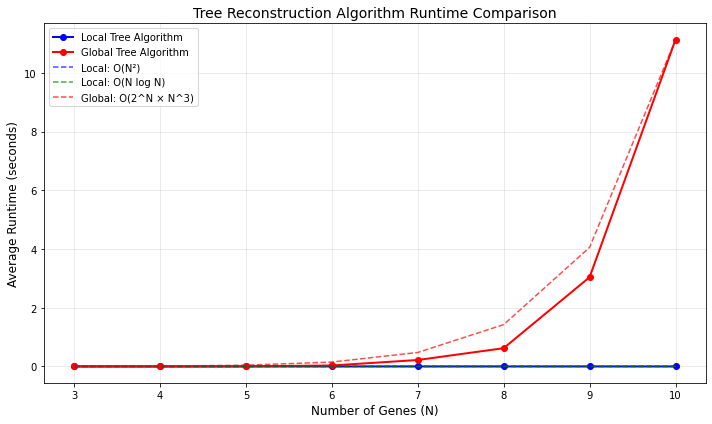

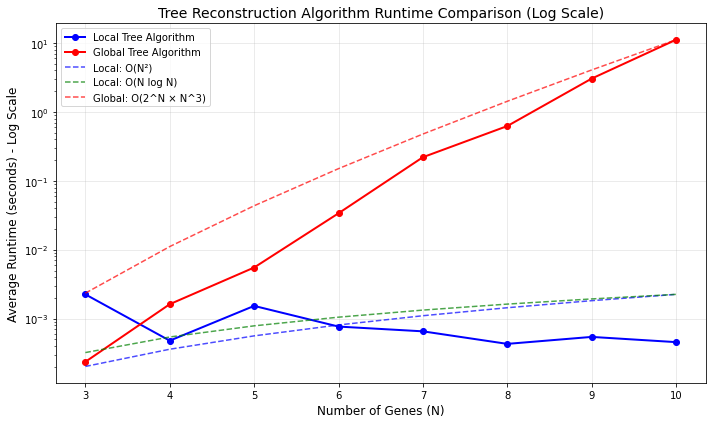

In [15]:
def plot_combined_results(local_results, global_results):
    '''
    Plots both algorithms on the same chart for comparison.
    
    Creates two plots:
    1. A standard plot showing runtime vs number of genes
    2. A log-scale plot emphasizing the exponential growth difference
    
    Parameters
    ----------
    local_results : dict
        Results dictionary from local algorithm with keys 'n_values' and 'times'
    global_results : dict
        Results dictionary from global algorithm with keys 'n_values' and 'times'
        
    Returns
    -------
    dict
        Dictionary containing the theoretical curve data:
        {'local': {'n2_curve': [...], 'nlogn_curve': [...]}, 
         'global': {'global_curve': [...]}}
    '''
    plt.figure(figsize=(10, 6))
    
    local_n = local_results['n_values']
    local_times = local_results['times']
    plt.plot(local_n, local_times, 'bo-', label='Local Tree Algorithm', linewidth=2)
    
    global_n = global_results['n_values']
    global_times = global_results['times']
    plt.plot(global_n, global_times, 'ro-', label='Global Tree Algorithm', linewidth=2)
    
    # Theoretical curves
    max_n_local = max(local_n)
    max_time_local = max(local_times)
    
    # O(n^2) theoretical for local
    n_squared = [n**2 for n in local_n]
    scale_n2 = max_time_local / (max_n_local**2)
    n2_curve = [scale_n2 * val for val in n_squared]
    plt.plot(local_n, n2_curve, 'b--', label='Local: O(N²)', alpha=0.7)

    # O(n log n) theoretical for local
    n_log_n = [n * np.log(n) for n in local_n]
    scale_nlogn = max_time_local / (max_n_local * np.log(max_n_local))
    nlogn_curve = [scale_nlogn * val for val in n_log_n]
    plt.plot(local_n, nlogn_curve, 'g--', label='Local: O(N log N)', alpha=0.7)
    
    # O(2^n * n^3) theoretical for global
    max_n_global = max(global_n)
    max_time_global = max(global_times)
    global_complexity = [2**n * (n**3) for n in global_n]
    scale_global = max_time_global / global_complexity[-1]
    global_curve = [scale_global * val for val in global_complexity]
    plt.plot(global_n, global_curve, 'r--', label='Global: O(2^N × N^3)', alpha=0.7)
    
    plt.xlabel('Number of Genes (N)', fontsize=12)
    plt.ylabel('Average Runtime (seconds)', fontsize=12)
    plt.title('Tree Reconstruction Algorithm Runtime Comparison', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.semilogy(local_n, local_times, 'bo-', label='Local Tree Algorithm', linewidth=2)
    plt.semilogy(global_n, global_times, 'ro-', label='Global Tree Algorithm', linewidth=2)
    
    plt.semilogy(local_n, n2_curve, 'b--', label='Local: O(N²)', alpha=0.7)
    plt.semilogy(local_n, nlogn_curve, 'g--', label='Local: O(N log N)', alpha=0.7)
    plt.semilogy(global_n, global_curve, 'r--', label='Global: O(2^N × N^3)', alpha=0.7)
    
    plt.xlabel('Number of Genes (N)', fontsize=12)
    plt.ylabel('Average Runtime (seconds) - Log Scale', fontsize=12)
    plt.title('Tree Reconstruction Algorithm Runtime Comparison (Log Scale)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return {
        'local': {'n2_curve': n2_curve, 'nlogn_curve': nlogn_curve},
        'global': {'global_curve': global_curve}
    }

n_values = [3, 4, 5, 6, 7, 8, 9, 10]
local_results = time_algorithm(n_values, reconstruct_tree_local)
global_results = time_algorithm(n_values, reconstruct_tree_global)
analysis = plot_combined_results(local_results, global_results)

# Probability Estimation

In [16]:
from collections import Counter

def count_edit_operations(parent, child):
    '''
    Count insertions, deletions, and mutations between parent and child sequences using dynamic programming.
    
    Parameters
    ----------
    parent : str
        The parent gene sequence
    child : str
        The child gene sequence
    
    Returns
    -------
    dict
        Dictionary with counts of each operation type:
        {'insertion': count, 'deletion': count, 'mutation': count}
    '''
    m, n = len(parent), len(child)
    
    # DP table
    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]
    operations = [[[] for _ in range(n+1)] for _ in range(m+1)] # operations tracking
    
    # base cases
    for i in range(m+1):
        dp[i][0] = i
        if i > 0:
            operations[i][0] = operations[i-1][0] + ['deletion']
    
    for j in range(n+1):
        dp[0][j] = j
        if j > 0:
            operations[0][j] = operations[0][j-1] + ['insertion']
    
    # filling the DP table
    for i in range(1, m+1):
        for j in range(1, n+1):
            if parent[i-1] == child[j-1]:
                dp[i][j] = dp[i-1][j-1]
                operations[i][j] = operations[i-1][j-1]
            else:
                deletion = dp[i-1][j] + 1
                insertion = dp[i][j-1] + 1
                substitution = dp[i-1][j-1] + 1
                
                min_val = min(deletion, insertion, substitution)
                dp[i][j] = min_val
                
                if min_val == deletion:
                    operations[i][j] = operations[i-1][j] + ['deletion']
                elif min_val == insertion:
                    operations[i][j] = operations[i][j-1] + ['insertion']
                else:
                    operations[i][j] = operations[i-1][j-1] + ['mutation']
    
    op_counter = Counter(operations[m][n])
    return {
        'insertion': op_counter['insertion'],
        'deletion': op_counter['deletion'],
        'mutation': op_counter['mutation']
    }

def estimate_probabilities(tree, gene_sequences):
    '''
    Estimate the probabilities of insertions, deletions, and mutations based on the genealogical tree.
    
    Uses dynamic programming to calculate edit distances between parent-child sequence pairs
    and aggregates results to estimate mutation probabilities.
    
    Parameters
    ----------
    tree : TreeNode
        The root node of the genealogical tree, where each node has attributes:
        gene_label, left, and right
    gene_sequences : dict
        Dictionary mapping gene labels to their corresponding sequences
    
    Returns
    -------
    dict
        Dictionary containing estimated probabilities for each operation type:
        {'insertion': probability, 'deletion': probability, 'mutation': probability}
    '''
    total_operations = {'insertion': 0, 'deletion': 0, 'mutation': 0}

    
    def traverse(node):
        if node.left:
            parent_seq = gene_sequences[node.gene_label]
            child_seq = gene_sequences[node.left.gene_label]
            ops = count_edit_operations(parent_seq, child_seq)
            for op_type, count in ops.items():
                total_operations[op_type] += count
            traverse(node.left)
        
        if node.right:
            parent_seq = gene_sequences[node.gene_label]
            child_seq = gene_sequences[node.right.gene_label]
            ops = count_edit_operations(parent_seq, child_seq)
            for op_type, count in ops.items():
                total_operations[op_type] += count
            traverse(node.right)
    
    traverse(tree)
    
    total_count = sum(total_operations.values())
    
    probabilities = {
        op_type: count / total_count if total_count > 0 else 0
        for op_type, count in total_operations.items()
    }
    
    return probabilities

In [17]:
gene_sequences = {label: seq for label, seq in set_strings}
probabilities = estimate_probabilities(root, gene_sequences)
print(probabilities)

{'insertion': 0.6213151927437641, 'deletion': 0.2675736961451247, 'mutation': 0.1111111111111111}
